# Linear Regression [20 marks]

In [1]:
# Packages needed
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_selection import r_regression
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

/Users/izzysouthon/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the auto MPG dataset using
data = sns.load_dataset('mpg')
data.drop('name', axis=1, inplace=True) # Dropping name as a variable 
data.head() # 9 features in original dataset

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin  
0          70    usa  
1          70    usa  
2          70    usa  
3          70    usa  
4          70    usa

In [3]:
X, y = data.drop('mpg', axis=1),  data['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=231) 
# Performing an 80/20 spilt to form the training and test sets, set the random seed to 231

### (a) EDA

In [4]:
X_train.shape # 318 instances/observations, 7 features 

(318, 7)

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 219 to 87
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     318 non-null    int64  
 1   displacement  318 non-null    float64
 2   horsepower    312 non-null    float64
 3   weight        318 non-null    int64  
 4   acceleration  318 non-null    float64
 5   model_year    318 non-null    int64  
 6   origin        318 non-null    object 
dtypes: float64(3), int64(3), object(1)
memory usage: 19.9+ KB


In [6]:
categorical_features = X_train.dtypes == 'object'
total_cat = categorical_features.sum()
numerical_features = (X_train.dtypes == 'int') | (X_train.dtypes == 'float')
total_num = numerical_features.sum()
print("Number of categorical features:", total_cat)
print("Number of numerical features:", total_num) 

Number of categorical features: 1
Number of numerical features: 6


In [7]:
X_train.isnull().sum() # horsepower is a numerical feature 

cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [8]:
X_train.describe() 

cylinders  displacement  horsepower       weight  acceleration  \
count  318.000000    318.000000   312.00000   318.000000    318.000000   
mean     5.380503    188.775157   103.88141  2931.971698     15.538365   
std      1.687736    103.373510    38.52934   828.675761      2.814536   
min      3.000000     68.000000    46.00000  1613.000000      8.000000   
25%      4.000000    101.750000    75.00000  2211.250000     13.900000   
50%      4.000000    140.500000    92.00000  2750.000000     15.500000   
75%      6.000000    258.000000   122.75000  3527.500000     17.000000   
max      8.000000    455.000000   230.00000  5140.000000     24.800000   

       model_year  
count  318.000000  
mean    76.232704  
std      3.757130  
min     70.000000  
25%     73.000000  
50%     76.000000  
75%     79.000000  
max     82.000000

In [9]:
X_train.corr()

cylinders  displacement  horsepower    weight  acceleration  \
cylinders      1.000000      0.947955    0.843822  0.890621     -0.515365   
displacement   0.947955      1.000000    0.900645  0.927749     -0.544376   
horsepower     0.843822      0.900645    1.000000  0.856494     -0.692642   
weight         0.890621      0.927749    0.856494  1.000000     -0.403676   
acceleration  -0.515365     -0.544376   -0.692642 -0.403676      1.000000   
model_year    -0.350308     -0.371855   -0.419622 -0.308975      0.289624   

              model_year  
cylinders      -0.350308  
displacement   -0.371855  
horsepower     -0.419622  
weight         -0.308975  
acceleration    0.289624  
model_year      1.000000

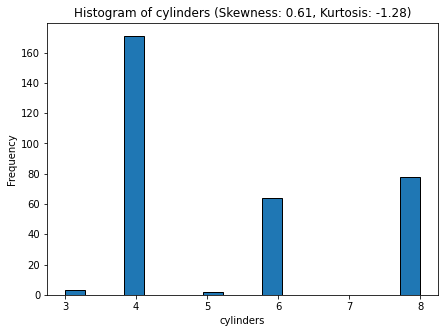

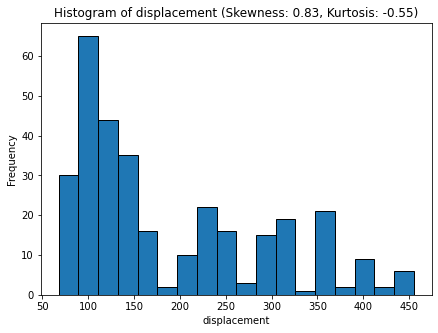

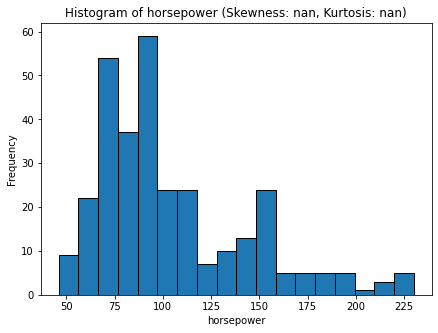

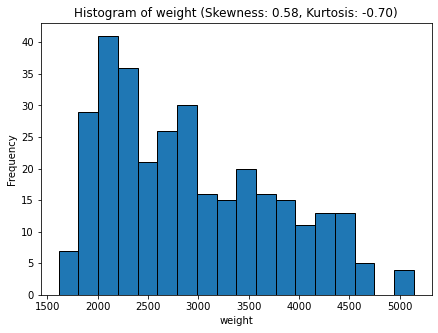

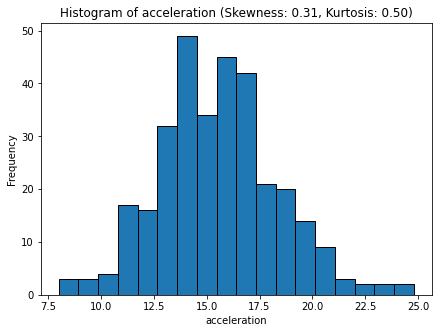

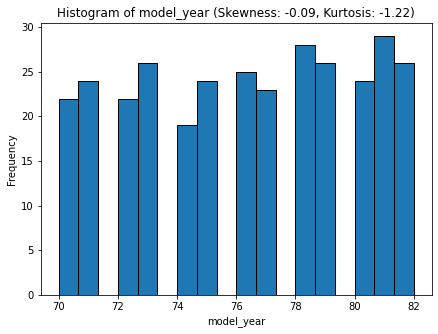

In [10]:
from scipy.stats import skew, kurtosis
# Plot histograms for all numerical features
df_subset = X_train[['cylinders', 'displacement', 'horsepower','weight','acceleration','model_year']]
for column in df_subset.columns:
    plt.figure(figsize=(7, 5))
    plt.hist(df_subset[column], bins=18, edgecolor='black')  
    skewness = skew(df_subset[column])
    kurt = kurtosis(df_subset[column])
    plt.title(f'Histogram of {column} (Skewness: {skewness:.2f}, Kurtosis: {kurt:.2f})')
    plt.xlabel(column)  # Set the x-axis label
    plt.ylabel('Frequency')  # Set the y-axis label
    plt.show()  # Show the plot

(array([195.,   0.,   0.,   0.,   0.,  62.,   0.,   0.,   0.,  61.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

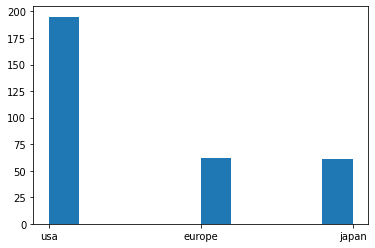

In [11]:
plt.hist(X_train['origin'])

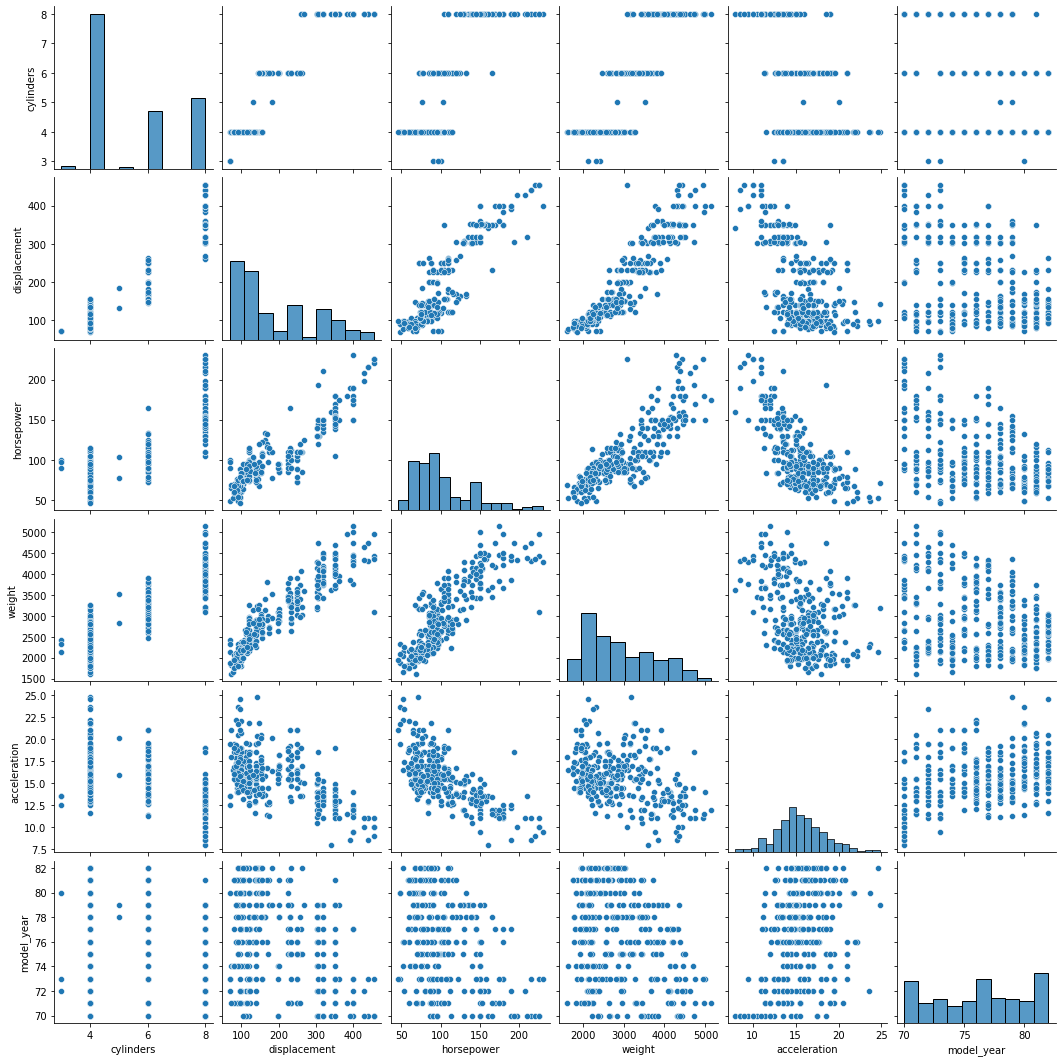

In [12]:
sns.pairplot(X_train)

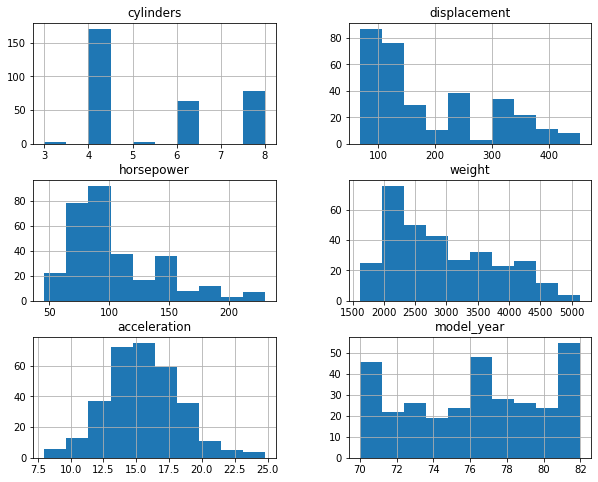

In [13]:
X_train.hist(figsize=(10, 8))  
plt.show()

<AxesSubplot:xlabel='displacement', ylabel='horsepower'>

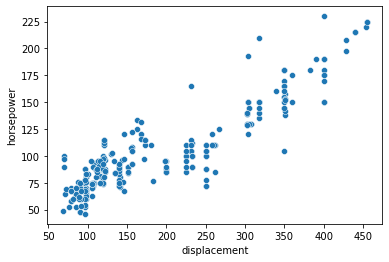

In [14]:
sns.scatterplot(x = X_train['displacement'], y = X_train['horsepower'])

<AxesSubplot:xlabel='displacement', ylabel='weight'>

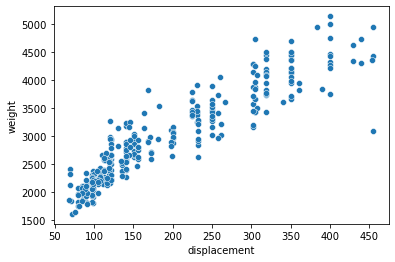

In [15]:
sns.scatterplot(x = X_train['displacement'], y = X_train['weight'])

<AxesSubplot:xlabel='displacement', ylabel='acceleration'>

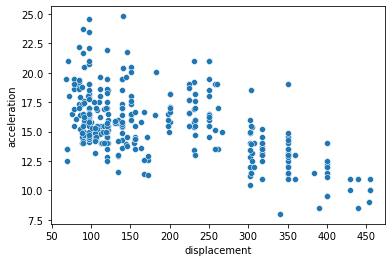

In [16]:
sns.scatterplot(x = X_train['displacement'], y = X_train['acceleration'])

<AxesSubplot:xlabel='horsepower', ylabel='weight'>

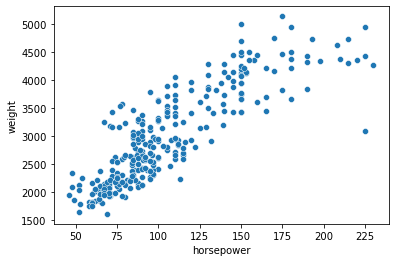

In [17]:
sns.scatterplot(x = X_train['horsepower'], y = X_train['weight'])

<AxesSubplot:xlabel='horsepower', ylabel='acceleration'>

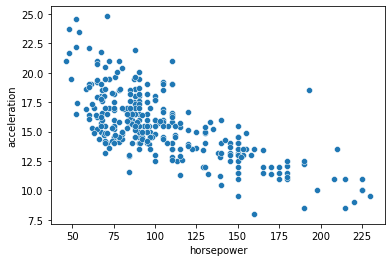

In [18]:
sns.scatterplot(x = X_train['horsepower'], y = X_train['acceleration'])

<AxesSubplot:xlabel='weight', ylabel='acceleration'>

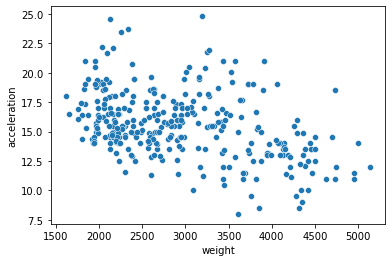

In [19]:
sns.scatterplot(x = X_train['weight'], y = X_train['acceleration'])

## (b) data preprocessing

In [20]:
X_train

cylinders  displacement  horsepower  weight  acceleration  model_year  \
219          4         122.0        96.0    2300          15.5          77   
157          8         350.0       145.0    4440          14.0          75   
242          4         121.0       110.0    2600          12.8          77   
287          8         351.0       138.0    3955          13.2          79   
230          8         350.0       170.0    4165          11.4          77   
..         ...           ...         ...     ...           ...         ...   
198          4          91.0        53.0    1795          17.4          76   
267          4         134.0        95.0    2560          14.2          78   
148          4         116.0        75.0    2246          14.0          74   
176          6         232.0        90.0    3211          17.0          75   
87           8         350.0       145.0    3988          13.0          73   

     origin  
219     usa  
157     usa  
242  europe  
287     usa  
230     usa  
..      ...  
198   japan  
267   japan  
148  europe  
176     usa  
87      usa  

[318 rows x 7 columns]

In [21]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [22]:
X_train_encoded=X_train.copy()
X_test_encoded=X_test.copy()

In [23]:
X_train_encoded.isna().sum() # 6 missing values for horsepower

cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [24]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Copy the data to avoid modifying the original datasets
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# One-hot encode 'origin' column
encoder = OneHotEncoder(sparse=False)

# Fit and transform on training data
onehot_encoded_train = encoder.fit_transform(X_train_encoded[['origin']])
onehot_encoded_test = encoder.transform(X_test_encoded[['origin']])

# Convert encoded arrays to DataFrames
onehot_df_train = pd.DataFrame(onehot_encoded_train, columns=encoder.get_feature_names_out(['origin']))
onehot_df_test = pd.DataFrame(onehot_encoded_test, columns=encoder.get_feature_names_out(['origin']))

# Concatenate the encoded data with the original data
X_train_encoded = pd.concat([X_train_encoded.drop(['origin'], axis=1), onehot_df_train], axis=1)
X_test_encoded = pd.concat([X_test_encoded.drop(['origin'], axis=1), onehot_df_test], axis=1)

# Impute missing values 
imputer = KNNImputer()

#X_train_impute = imputer.fit_transform(X_train_encoded)
#X_test_impute = imputer.transform(X_test_encoded)
#X_train_impute 

# Only want to impute missing values for horsepower
X_train_encoded['horsepower'] = imputer.fit_transform(X_train_encoded['horsepower'].values.reshape(-1, 1))
X_test_encoded['horsepower'] = imputer.transform(X_test_encoded['horsepower'].values.reshape(-1, 1))
X_train_encoded

cylinders  displacement  horsepower  weight  acceleration  model_year  \
0            4         122.0        96.0    2300          15.5          77   
1            8         350.0       145.0    4440          14.0          75   
2            4         121.0       110.0    2600          12.8          77   
3            8         351.0       138.0    3955          13.2          79   
4            8         350.0       170.0    4165          11.4          77   
..         ...           ...         ...     ...           ...         ...   
313          4          91.0        53.0    1795          17.4          76   
314          4         134.0        95.0    2560          14.2          78   
315          4         116.0        75.0    2246          14.0          74   
316          6         232.0        90.0    3211          17.0          75   
317          8         350.0       145.0    3988          13.0          73   

     origin_europe  origin_japan  origin_usa  
0              0.0           0.0         1.0  
1              0.0           0.0         1.0  
2              1.0           0.0         0.0  
3              0.0           0.0         1.0  
4              0.0           0.0         1.0  
..             ...           ...         ...  
313            0.0           1.0         0.0  
314            0.0           1.0         0.0  
315            1.0           0.0         0.0  
316            0.0           0.0         1.0  
317            0.0           0.0         1.0  

[318 rows x 9 columns]

In [25]:
# Convert from numpy array to Panda dataframe
columns_train = X_train_encoded.columns
columns_test = X_test_encoded.columns
X_train = pd.DataFrame(X_train_encoded, columns=columns_train)
X_test = pd.DataFrame(X_test_encoded, columns=columns_test)
X_train

cylinders  displacement  horsepower  weight  acceleration  model_year  \
0            4         122.0        96.0    2300          15.5          77   
1            8         350.0       145.0    4440          14.0          75   
2            4         121.0       110.0    2600          12.8          77   
3            8         351.0       138.0    3955          13.2          79   
4            8         350.0       170.0    4165          11.4          77   
..         ...           ...         ...     ...           ...         ...   
313          4          91.0        53.0    1795          17.4          76   
314          4         134.0        95.0    2560          14.2          78   
315          4         116.0        75.0    2246          14.0          74   
316          6         232.0        90.0    3211          17.0          75   
317          8         350.0       145.0    3988          13.0          73   

     origin_europe  origin_japan  origin_usa  
0              0.0           0.0         1.0  
1              0.0           0.0         1.0  
2              1.0           0.0         0.0  
3              0.0           0.0         1.0  
4              0.0           0.0         1.0  
..             ...           ...         ...  
313            0.0           1.0         0.0  
314            0.0           1.0         0.0  
315            1.0           0.0         0.0  
316            0.0           0.0         1.0  
317            0.0           0.0         1.0  

[318 rows x 9 columns]

In [26]:
X_train.dtypes

cylinders          int64
displacement     float64
horsepower       float64
weight             int64
acceleration     float64
model_year         int64
origin_europe    float64
origin_japan     float64
origin_usa       float64
dtype: object

## (c) construct a linear model

In [27]:
from sklearn import linear_model
#orinary_LR
reg = linear_model.LinearRegression()

# Train the model using the training sets
reg.fit(X_train, y_train)

# Predict on the testing and training set
pre_y_test=reg.predict(X_test)
pre_y_train=reg.predict(X_train)

# Coefficients
print("Coefficients: \n", reg.coef_)

Coefficients: 
 [-0.61456725  0.02808721 -0.01307038 -0.00722961  0.12042933  0.74020999
  0.74572188  1.11420109 -1.85992297]


In [28]:
from sklearn.metrics import mean_squared_error, r2_score

print("Mean squared error(train): %.2f" % mean_squared_error(pre_y_train, y_train))
print("R2(train): %.2f" % r2_score(pre_y_train, y_train))

print("Mean squared error(test): %.2f" % mean_squared_error(pre_y_test, y_test))
print("R2(test): %.2f" % r2_score(pre_y_test, y_test))

Mean squared error(train): 10.78
R2(train): 0.78
Mean squared error(test): 10.63
R2(test): 0.80


## (d) enhance the model by applying regularisation methods

In [29]:
#RidgeRegression
reg_rid = linear_model.Ridge(alpha=1)

# Train the model using the training sets
reg_rid.fit(X_train, y_train)

# Predict on the testing and training set
pre_y_rid_test=reg_rid.predict(X_test)
pre_y_rid_train=reg.predict(X_train)


print("Mean squared error(train): %.2f" % mean_squared_error(pre_y_rid_train, y_train))
print("R2(train): %.2f" % r2_score(pre_y_rid_train, y_train))

print("Mean squared error(test): %.2f" % mean_squared_error(pre_y_rid_test, y_test))
print("R2(test): %.2f" % r2_score(pre_y_rid_test, y_test))

Mean squared error(train): 10.78
R2(train): 0.78
Mean squared error(test): 10.63
R2(test): 0.80


In [30]:
#Lasso Regression
reg_las = linear_model.Lasso(alpha=1)

# Train lasso regression model using the training sets
reg_las.fit(X_train, y_train)

# Predict on the testing and training set
pre_y_las_test=reg_las.predict(X_test)

pre_y_las_train=reg.predict(X_train)

print("Mean squared error(train): %.2f" % mean_squared_error(pre_y_las_train, y_train))
print("R2(train): %.2f" % r2_score(pre_y_las_train, y_train))

print("Mean squared error(test): %.2f" % mean_squared_error(pre_y_las_test, y_test))
print("R2(test): %.2f" % r2_score(pre_y_las_test, y_test))

Mean squared error(train): 10.78
R2(train): 0.78
Mean squared error(test): 11.47
R2(test): 0.77
